# Семинар 1: введение в Tensorflow

Фрэймворком для обучения нейросеток на нашем курсе будет Tensorflow. Чтобы установить библиотеку, отправляйтесь в консоль и пропишите 

```
pip install tensorflow 
```

Мы будем использовать вторую версию. Если вы до этого сидели на старой версии tensorflow, на всякий случай снесите её. Иначе при установке могут возникнуть какие-нибудь несовместимости и ошибки.

In [ ]:
!pip install tensorflow

In [1]:
import numpy as np
np.__version__

'1.19.4'

In [2]:
import tensorflow as tf
tf.__version__ 

'2.5.0'

# 0. Tensoflow teaser

Давайте реализуем на `numpy` и на `tensorflow` функцию для поиска суммы квадратов первых $N$ чисел и посмотрим насколько быстро эти функции работают.

In [3]:
np.sum(np.arange(10)**2)

285

In [4]:
def np_sum_squares(N):
    return np.sum(np.arange(N)**2)

In [5]:
%%timeit
N = 10**8
np_sum_squares(N)

1.23 s ± 29.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Tensorflow из-за того, что мы сначала задаём структуру вычислений, а после осуществляем их, работает быстрее.

In [6]:
def tf_sum_squares(N):
    N = tf.constant(N, dtype='int64')
    return tf.reduce_sum((tf.range(N)**2))

In [7]:
%%timeit
N = 10**8
tf_sum_squares(N)

824 ms ± 28.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Более того, когда вы уже задали свой граф вычислений и убедились, что всё работает, можно вызвать декоратор `tf.function`. [Он сделает работу заданного графа](https://www.tensorflow.org/tutorials/customization/performance) более оптимальной и ещё сильнее ускорит код. 

In [8]:
@tf.function
def tf_sum_squares(N):
    N = tf.constant(N, dtype='int64')
    return tf.reduce_sum((tf.range(N)**2))

In [9]:
%%timeit
N = 10**8
tf_sum_squares(N)

247 µs ± 61.6 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


Если сравнивать время, то мы видим значительный прогресс в скорости вычислений даже для простой задачи. Данный прирост будет значительно большим для тяжелых рассчетов.

# 1. Тензоры и базовые операции над ними

Основной объект в tensorflow - это **тензор.** Или многомерный массив чисел. Чтобы не нужно было учить кучу новых команд, tensorflow косплеит numpy. 

```
    np.zeros -> tf.zeros
    np.sin -> tf.sin
    np.mean -> tf.reduce_mean
    np.arange -> tf.range
    np.cumsum -> tf.cumsum
```

Правда говоря, не совсем косплеит. Но чаще всего оказываетс довольно близок.

In [10]:
# можно задать тензор из нулей
tf.zeros([3, 4])

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]], dtype=float32)>

In [11]:
# или из единиц, но уже более сложной размерности
tf.ones([3, 4, 2])

<tf.Tensor: shape=(3, 4, 2), dtype=float32, numpy=
array([[[1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.]],

       [[1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.]],

       [[1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.]]], dtype=float32)>

In [12]:
# можно сгенерировать тензор из нормального распределения
tf.random.normal([2,2])

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[ 0.5842428 , -0.32981437],
       [-0.8551928 ,  0.24979615]], dtype=float32)>

In [13]:
# можно просто сделать залифку тензора какими-то числами
tf.fill([2, 2], 0.5)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[0.5, 0.5],
       [0.5, 0.5]], dtype=float32)>

In [14]:
# можно создать матрицу в numpy
x = np.array([[1, 2, 3, 4],
              [4, 3, 2, 1]])
x

array([[1, 2, 3, 4],
       [4, 3, 2, 1]])

In [15]:
# а потом перевести её в тензор
tf.convert_to_tensor(x, tf.float32) 

<tf.Tensor: shape=(2, 4), dtype=float32, numpy=
array([[1., 2., 3., 4.],
       [4., 3., 2., 1.]], dtype=float32)>

In [16]:
# или можно просто сразу создать тензор 
tf.constant([[1,  2,  3,  4],
             [5,  6,  7,  8],
             [9, 10, 11, 12]])

<tf.Tensor: shape=(3, 4), dtype=int32, numpy=
array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]], dtype=int32)>

In [17]:
# наверное, стоит уточнить тип данных в тензоре
x = tf.constant([[1,  2,  3,  4],
                 [5,  6,  7,  8],
                 [9, 10, 11, 12]], dtype=tf.float32)

Все срезы, операции, размерности работают как в numpy.

In [18]:
x.dtype

tf.float32

In [19]:
x.shape

TensorShape([3, 4])

In [20]:
x[0]

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([1., 2., 3., 4.], dtype=float32)>

In [21]:
x[:,1]

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([ 2.,  6., 10.], dtype=float32)>

In [22]:
x + 10

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[11., 12., 13., 14.],
       [15., 16., 17., 18.],
       [19., 20., 21., 22.]], dtype=float32)>

In [23]:
x[x > 3]

<tf.Tensor: shape=(9,), dtype=float32, numpy=array([ 4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.], dtype=float32)>

In [24]:
y = tf.constant([[12, 11, 10, 9],
                  [8, 7, 6, 5],
                  [4, 3, 2, 1]], dtype=tf.float32)

In [25]:
x + y

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[13., 13., 13., 13.],
       [13., 13., 13., 13.],
       [13., 13., 13., 13.]], dtype=float32)>

In [26]:
x**y

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[1.00000e+00, 2.04800e+03, 5.90490e+04, 2.62144e+05],
       [3.90625e+05, 2.79936e+05, 1.17649e+05, 3.27680e+04],
       [6.56100e+03, 1.00000e+03, 1.21000e+02, 1.20000e+01]],
      dtype=float32)>

In [27]:
tf.math.exp(x)

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[2.7182817e+00, 7.3890562e+00, 2.0085537e+01, 5.4598148e+01],
       [1.4841316e+02, 4.0342877e+02, 1.0966332e+03, 2.9809580e+03],
       [8.1030840e+03, 2.2026465e+04, 5.9874141e+04, 1.6275480e+05]],
      dtype=float32)>

In [28]:
# Когда надоело работать с тензором, можно вернуться назад в numpy формат
x.numpy() 

array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6.,  7.,  8.],
       [ 9., 10., 11., 12.]], dtype=float32)

In [29]:
# тип у тензоров может быть разный, но всегда один
tf.constant("hello world")

<tf.Tensor: shape=(), dtype=string, numpy=b'hello world'>

### Задание 1:

Попробуйте реализовать на tensorflow сигмоиду. 

$$ \sigma(x) = \frac{1}{1 + e^{-x}} $$

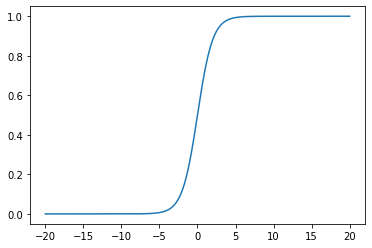

In [39]:
import matplotlib.pyplot as plt

x = tf.linspace(-20, 20, 1000)

@tf.function
def sigm(x):
    return 1/(1 + tf.exp(-x))

y = sigm(x)

plt.plot(x, y);

In [50]:
x = tf.reshape(tf.linspace(-1, 1, 5), (5, 1))
x

<tf.Tensor: shape=(5, 1), dtype=float64, numpy=
array([[-1. ],
       [-0.5],
       [ 0. ],
       [ 0.5],
       [ 1. ]])>

In [57]:
# P(y = 0), P(y = 1)
tf.concat((1 - sigm(x), sigm(x)), axis=1)

<tf.Tensor: shape=(5, 2), dtype=float64, numpy=
array([[0.73105858, 0.26894142],
       [0.62245933, 0.37754067],
       [0.5       , 0.5       ],
       [0.37754067, 0.62245933],
       [0.26894142, 0.73105858]])>

In [73]:
x = tf.reshape(tf.range(15, dtype=tf.float32), (5, 3))
x = x + tf.random.normal((5,3))
x

<tf.Tensor: shape=(5, 3), dtype=float32, numpy=
array([[-0.79913163,  0.72022235,  1.8107333 ],
       [ 1.66223   ,  5.8366947 ,  4.86984   ],
       [ 6.807043  ,  7.6144543 , 10.044247  ],
       [ 8.368908  ,  9.645565  , 12.189887  ],
       [11.5396595 , 12.268789  , 12.931279  ]], dtype=float32)>

In [74]:
#  P(y = 0), P(y = 1), P(y = 2)
tf.nn.softmax(x)

<tf.Tensor: shape=(5, 3), dtype=float32, numpy=
array([[0.0521744 , 0.23839906, 0.7094266 ],
       [0.01102232, 0.7165065 , 0.27247116],
       [0.03483773, 0.07810953, 0.8870528 ],
       [0.01990703, 0.07135946, 0.9087335 ],
       [0.1409516 , 0.29223153, 0.56681687]], dtype=float32)>

In [75]:
tf.reshape(tf.reduce_sum(tf.exp(x), axis=1), (5,1))

<tf.Tensor: shape=(5, 1), dtype=float32, numpy=
array([[8.6195393e+00],
       [4.7821606e+02],
       [2.5954428e+04],
       [2.1655297e+05],
       [7.2868600e+05]], dtype=float32)>

In [76]:
tf.exp(x)/tf.reshape(tf.reduce_sum(tf.exp(x), axis=1), (5,1))

<tf.Tensor: shape=(5, 3), dtype=float32, numpy=
array([[0.0521744 , 0.23839907, 0.7094266 ],
       [0.01102232, 0.71650654, 0.27247116],
       [0.03483772, 0.07810953, 0.8870528 ],
       [0.01990703, 0.07135946, 0.9087335 ],
       [0.1409516 , 0.29223153, 0.56681687]], dtype=float32)>

### Задание 2:

Попробуйте реализовать на tensorflow среднюю квадратичную ошибку. 

$$ 
MSE(\hat y, y) = \frac{1}{n} \cdot \sum_{i=1}^n (\hat y - y)^2
$$

In [84]:
y_pred = tf.constant([1, 2, 3, 4, 5], dtype=tf.float32)
y_test = np.array([-1, 3, 4, 6, -5])

y_test = tf.convert_to_tensor(y_test, tf.float32) 

@tf.function
def mse(y_true, y_predict):
    return tf.reduce_mean((y_true - y_pred)**2)

z = mse(y_test, y_pred)
z

<tf.Tensor: shape=(), dtype=float32, numpy=22.0>

In [85]:
z.numpy()

22.0

In [87]:
# Uint64   2**64
# Int64    2**63 - 1

# 64 - 8 байт для хранения, в каждом байте 8 бит => 64 ячейки

9223372036854775808

------------------------------------------

# 2. Производные да градиенты

Тензорфлоу может вычислять производные и градиенты автоматически. Для этого используется [`GradientTape.`](https://www.tensorflow.org/tutorials/customization/autodiff)

Он проходит по всем операциям, которые фигурируют в графе, и применяет к ним chain rule:

$$ {\partial f(g(x)) \over \partial x} = {\partial f(g(x)) \over \partial g(x)}\cdot {\partial g(x) \over \partial x} $$

Мы можем посчитать производную по любому тензору, участвующему в вычислениях.

In [89]:
x = tf.constant([0.3, 1])

# опция persistent=True позволяет искать производную много раз, а не один
with tf.GradientTape(persistent=True) as t:
    t.watch(x)
    y = tf.reduce_sum(x)
    z = y**2

In [90]:
t.gradient(z, x)

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([2.6, 2.6], dtype=float32)>

In [91]:
t.gradient(z, y)

<tf.Tensor: shape=(), dtype=float32, numpy=2.6>

Нарисуем функцию и её производную на картинке :) 

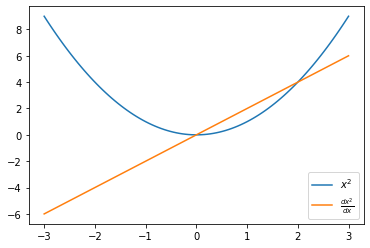

In [92]:
import matplotlib.pyplot as plt
%matplotlib inline

x = tf.linspace(-3., 3., 100)

with tf.GradientTape(persistent=True) as t:
    t.watch(x)
    y = x**2

dy_dx = t.gradient(y, x)

plt.plot(x, y, label="$x^2$")
plt.plot(x, dy_dx, label=r"$\frac{dx^2}{dx}$")
plt.legend();

### Задание 3:

Реализуйте расчёт градиента для функции 

$$
f(w) = \prod_{i,j} \ln(\ln(w_{ij} + 7) 
$$

в точке `w = [[5,10], [1,2]]`

In [103]:
# ваш код
w = tf.constant([[5.,10], [1,2]])

with tf.GradientTape(persistent=False) as t:
    t.watch(w)
    f = tf.reduce_prod(tf.math.log(tf.math.log(w + 7)))
    
df_dw = t.gradient(f,w)
df_dw

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[0.0201272 , 0.01089125],
       [0.04485611, 0.03509369]], dtype=float32)>

In [104]:
t.gradient(f,w)

RuntimeError: A non-persistent GradientTape can only be used to compute one set of gradients (or jacobians)

# 3. Переменные

Следущий важный объект в tensorflow это **переменная.** Она представляет из себя некоторый буфер в памяти, который содержит текущие тензоры. 

* Переменную можно вставить в любое место графа 
* Переменные можно использовать, чтобы описать какую-то трансформацию
* В процессе расчётов их можно изменять
* Обычно их используют для описания параметров модели

In [105]:
w = tf.Variable(initial_value=0.5)
w

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.5>

In [106]:
x = np.array([1,2,3], dtype=float)
x

array([1., 2., 3.])

In [107]:
x*w

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.5, 1. , 1.5], dtype=float32)>

Более того, переменные хороши тем, что Tensorflow сразу же следит за ними при вычислении производных. Ему не надо указывать с помощью команды `watch`, за каким тензором нужно приглядывать. 

### Задание 4:

Реализуйте расчёт градиента для функции 

$$
f(w) = \prod_{i,j} \ln(\ln(w_{ij} + 7) 
$$

в точке `w = [[5,10], [1,2]]`. Отличие от предыдущей задачки такое: надо задать $w$ не как тензор, а как переменную. 

In [109]:
# ваш код
w = tf.Variable(initial_value = [[5.,10], [1,2]])

with tf.GradientTape(persistent=False) as t:
    f = tf.reduce_prod(tf.math.log(tf.math.log(w + 7)))
    
df_dw = t.gradient(f,w)
df_dw

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[0.0201272 , 0.01089125],
       [0.04485611, 0.03509369]], dtype=float32)>

In [114]:
# ваш код
w = tf.Variable(initial_value = [[5.,10], [1,2]])
v = tf.Variable(initial_value = tf.random.uniform((2,2)))

with tf.GradientTape(persistent=False) as t:
    f = tf.reduce_prod(v * tf.math.log(tf.math.log(w + 7)))
    
df_dw = t.gradient(f, [w, v])
df_dw

[<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
 array([[0.00021705, 0.00011745],
        [0.00048373, 0.00037845]], dtype=float32)>,
 <tf.Tensor: shape=(2, 2), dtype=float32, numpy=
 array([[0.02123523, 0.05350089],
        [0.01262408, 0.00778829]], dtype=float32)>]

------------------------------------------

# 4. Оптимизация

Итак, tf умеет искать производные, осталось научиться применять его для оптимизации. 

Попробуем решить глупую задачку по конвертации градусов по цельсию в градусы по фаренгейту. По данным будем пытаться восстановить формулу: 

$$ f = c \times 1.8 + 32 $$

In [115]:
celsius    = np.array([-40, -10,  0,  8, 15, 22,  38],  dtype='float32')
fahrenheit = np.array([-40,  14, 32, 46, 59, 72, 100],  dtype='float32')

for i,c in enumerate(celsius):
    print("{} degrees Celsius = {} degrees Fahrenheit".format(c, fahrenheit[i]))

-40.0 degrees Celsius = -40.0 degrees Fahrenheit
-10.0 degrees Celsius = 14.0 degrees Fahrenheit
0.0 degrees Celsius = 32.0 degrees Fahrenheit
8.0 degrees Celsius = 46.0 degrees Fahrenheit
15.0 degrees Celsius = 59.0 degrees Fahrenheit
22.0 degrees Celsius = 72.0 degrees Fahrenheit
38.0 degrees Celsius = 100.0 degrees Fahrenheit


In [116]:
# параметры модели 
a = tf.Variable(tf.random.normal([1]), name='bias')
b = tf.Variable(tf.random.normal([1]), name='k')

a.numpy(), b.numpy()

(array([1.2689415], dtype=float32), array([2.3463488], dtype=float32))

In [117]:
a, b

(<tf.Variable 'bias:0' shape=(1,) dtype=float32, numpy=array([1.2689415], dtype=float32)>,
 <tf.Variable 'k:0' shape=(1,) dtype=float32, numpy=array([2.3463488], dtype=float32)>)

In [118]:
# Наша модель
def linear_regression(x):
    return a + b*x

# Ошибка для модели
def mean_square(y_pred, y_true):
    return tf.reduce_mean((y_pred-y_true)**2)

In [119]:
linear_regression(celsius).numpy()

array([-92.58501  , -22.194546 ,   1.2689415,  20.039732 ,  36.464172 ,
        52.888615 ,  90.4302   ], dtype=float32)

In [120]:
mean_square(linear_regression(celsius), fahrenheit).numpy()

951.1787

In [121]:
# оптимизатор 
optimizer = tf.optimizers.SGD(learning_rate=0.001)

# процесс оптимизации
def model_train(X, Y):

    # находим loss и пробрасываем градиент
    with tf.GradientTape() as g:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)

    # Вычисляем градиенты
    gradients = g.gradient(loss, [a, b])
    
    # Обновляем веса a и b в ходе одной итерации спуска 
    optimizer.apply_gradients(zip(gradients, [a, b]))

In [122]:
# Обучение
epochs = 2000 # число эпох 

for i in range(epochs):
    
    # Делаем щаг градиентного спуска 
    model_train(celsius, fahrenheit)
    
    # Каждую сотую итерацию следим за тем, что произошло
    if i%100 == 0:
        y_pred = linear_regression(celsius)
        loss_val = mean_square(y_pred, fahrenheit)
        print("step: %i, loss: %f, a: %f, b: %f" % (i, loss_val, a.numpy(), b.numpy()))

step: 0, loss: 901.493347, a: 1.325138, b: 2.021914
step: 100, loss: 613.322388, a: 6.681525, b: 2.011219
step: 200, loss: 417.583405, a: 11.100938, b: 1.973922
step: 300, loss: 284.319794, a: 14.747484, b: 1.943148
step: 400, loss: 193.591171, a: 17.756315, b: 1.917755
step: 500, loss: 131.820892, a: 20.238974, b: 1.896803
step: 600, loss: 89.766548, a: 22.287453, b: 1.879516
step: 700, loss: 61.135242, a: 23.977684, b: 1.865251
step: 800, loss: 41.642242, a: 25.372335, b: 1.853481
step: 900, loss: 28.371058, a: 26.523085, b: 1.843770
step: 1000, loss: 19.335770, a: 27.472589, b: 1.835757
step: 1100, loss: 13.184281, a: 28.256052, b: 1.829145
step: 1200, loss: 8.996206, a: 28.902504, b: 1.823689
step: 1300, loss: 6.144962, a: 29.435888, b: 1.819188
step: 1400, loss: 4.203756, a: 29.875998, b: 1.815474
step: 1500, loss: 2.882118, a: 30.239147, b: 1.812409
step: 1600, loss: 1.982339, a: 30.538782, b: 1.809880
step: 1700, loss: 1.369733, a: 30.786022, b: 1.807794
step: 1800, loss: 0.9526

Можно сделать то же самое, но с визуализацией. 

In [ ]:
from IPython.display import clear_output

epochs = 2000 # число эпох 

ass = [a.numpy()[0]] # стартовые точки 
bss = [b.numpy()[0]] 

for i in range(epochs):
    # Делаем щаг градиентного спуска 
    model_train(celsius, fahrenheit)
    
    if i%25 == 0:
        # Пополняем запас точек 
        ass.append(a.numpy()[0])
        bss.append(b.numpy()[0])

        clear_output(True) # чтобы всё на одной картинке рисовалось, а не на милионе
        plt.plot(ass, bss, marker='.')
        plt.scatter(32, 1.8, c='red')
        plt.show()

### Задание 5:

Реализуйте для функции 

$$
f(w) = \prod_{i,j} \ln(\ln(w_{ij} + 7) 
$$

процедуру градиентного спуска. Каким получилось минимальное значение? 

In [145]:
# ваш код
optimizer = tf.optimizers.SGD(learning_rate=0.1)

w = tf.Variable(initial_value = [[5.,10], [1,2]])

@tf.function
def f(w):
    y = tf.reduce_prod(tf.math.log(tf.math.log(w + 7)))
    return y

def optimization_step():
    
    with tf.GradientTape() as t:
        y =f(w)
    
    dy_dw = t.gradient(y, [w])
    optimizer.apply_gradients(zip(dy_dw, [w]))

In [146]:
w

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[ 5., 10.],
       [ 1.,  2.]], dtype=float32)>

In [147]:
optimization_step()

In [148]:
w

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[4.9979873, 9.998911 ],
       [0.9955144, 1.9964906]], dtype=float32)>

In [149]:
EPOCH = 500

for i in range(EPOCH):
    optimization_step()
    
w

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[ 4.1290555,  9.549754 ],
       [-1.7121141,  0.2518414]], dtype=float32)>

# 5. Моя первая нейросеть 

Для того, чтобы разобраться как обучать нейросити, нужно освоить три вещи: 

1. Как обрабатывать поток данных и пихать его в сетку
2. Как сделать сетку
3. Как написать цикл обучения

Раньше все учили свою первую нейросеть на [наборе рукопистных цифр MNIST.](http://yann.lecun.com/exdb/mnist/) Теперь это не модно. Если где-то кто-то будет проводить у вас семинар с участием этого датасета, так и скажите ему: __это не модно!__  Хлопать дверью или нет --- на ваше усмотрение. 

На арене туториалов новый король: [Fashion MNIST.](https://www.tensorflow.org/tutorials/keras/classification) По ссылке лежит туториал с строительством нейросетки на этом наборе, но с участием Keras. Мы пока что обойдёмся без него.


### 5.0 Данные

In [167]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [168]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [169]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Нарисуем несколько рандомных картинок из тренировочной выборки. 

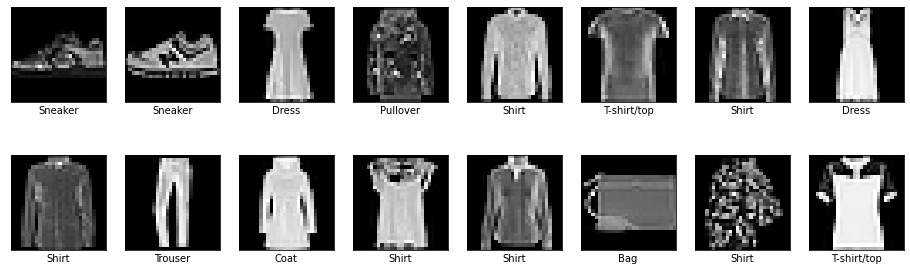

In [170]:
cols = 8
rows = 2
fig = plt.figure(figsize=(2 * cols, 2.5 * rows))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_train))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid(False)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.imshow(X_train[random_index, :], cmap = 'gray')
        ax.set_xlabel(class_names[y_train[random_index]])
plt.show()

Каждая картинка это матрица из чисел. Если число большое - пиксель яркий. Если маленькое - тёмный. Яркость измеряется по шкале от $0$ до $255$.

In [171]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

Картинка - матрица. 

In [172]:
X_train[0].shape

(28, 28)

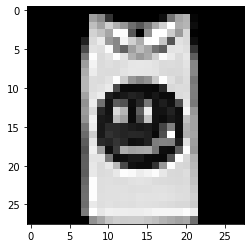

In [176]:
plt.imshow(X_train[101], cmap='gray')

In [178]:
class_names[ y_train[101] ]

'T-shirt/top'

Давайте отнормируем выборку. 

In [179]:
X_train = X_train/255
X_test = X_test/255

Будем прогнозировать тип картинки по её пикселям. Давайте растянем её в вектор из $28 \times 28$ фичей.

In [180]:
X_train = X_train.reshape(X_train.shape[0], 28**2)
X_test = X_test.reshape(X_test.shape[0], 28**2)
X_train.shape

(60000, 784)

Поставим для данных тип, чтобы ничего не поломалось.

In [181]:
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)

## 5.1 Обработка потока данных

Чтобы в tensorflow эффективно итерироваться по данным и применять к ним различные преобразования, о которых вы узнает позже - нужно [создать из них `Dataset`](https://www.tensorflow.org/guide/data?hl=ur)

In [182]:
x = [8, 3, 0, 8, 2, 1]

dataset = tf.data.Dataset.from_tensor_slices(x)
dataset

<TensorSliceDataset shapes: (), types: tf.int32>

`Dataset` это итератор. Когда мы будем работать с большими данными, мы будем писать на его основе итераторы, которые будут считывать данные прямо с компьютера и после использования выкидывать их из оперативной памяти.

In [183]:
it = range(5)
it

range(0, 5)

In [184]:
for i in it:
    print(i)

0
1
2
3
4


In [185]:
for elem in dataset:
    print(elem.numpy())

8
3
0
8
2
1


У датасетов есть много интересных методов. Например, в них можно перемешивать данные и разбивать их на батчи. 

In [187]:
x = [8, 3, 0, 8, 2, 1]
y = [1, 0, 1, 1, 0, 1]

# создали объект с данными для обучения 
dataset = tf.data.Dataset.from_tensor_slices((x, y))

# перемешали данные с окном в 10 и сделали кучу батчей размера 2 
dataset = dataset.shuffle(10).batch(2)

In [188]:
for item,jtem in dataset:
    print(item.numpy(),jtem.numpy())

[8 1] [1 1]
[2 0] [0 1]
[8 3] [1 0]


Для первого раза этих двух преобразований нам будет достаточно.

### Задание 6:

Напишите итератор для тренировочной и тестовой выборок. Попробуйте проитерироваться по нескольким его первым объектам с помощью цикла. 

In [314]:
# ваш код
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train))
test_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test))

train_ds = train_ds.shuffle(10000).batch(256)
test_ds = test_ds.batch(256)

In [315]:
for x,y in train_ds:
    break

In [316]:
x.shape, y.shape

(TensorShape([256, 784]), TensorShape([256]))

## 5.2 Нейронная сеть

Собирать нейронную сеть в tensorflow можно разными способами. Давайте посмотрим на три разных.

__Способ 1:__ для того, чтобы в hight-level tensorflow создавать нейросети, обычно используют класс `Model`. Например, это можно сделать следующим образом.

In [229]:
from tensorflow.keras import Model, layers

# Объявляем как должна будет выглядеть модель
class MyModel(Model):
    
    def __init__(self):
        super(MyModel, self).__init__()
        
        self.d1 = layers.Dense(64, activation='relu')
        self.d2 = layers.Dense(32, activation='relu')
        self.d3 = layers.Dense(10, activation='softmax')

    def call(self, x):
        x = self.d1(x)
        x = self.d2(x)
        return self.d3(x)

# создаём один экземпляр модели
model = MyModel()
model

In [230]:
model(X_train[:3]) # получили предсказания модели

<tf.Tensor: shape=(3, 10), dtype=float32, numpy=
array([[0.06456672, 0.06495962, 0.18840112, 0.11949279, 0.07986197,
        0.13013268, 0.03888632, 0.08496569, 0.07674498, 0.15198806],
       [0.04005869, 0.06360934, 0.18685204, 0.13020875, 0.10352151,
        0.20560767, 0.02367088, 0.04781153, 0.06335712, 0.13530247],
       [0.06783485, 0.10088729, 0.1616429 , 0.09816212, 0.11244921,
        0.13114288, 0.05322766, 0.07405224, 0.08450036, 0.11610051]],
      dtype=float32)>

Как мы видим на данном примере, у данного класса должно быть метод `call`, который определяет прямой проход нейросети. Также из класса выше видно, что модуль `keras.layers` содержит в себе реализацию большинства слоев.

Если вы не очень поняли, что произошло, не пугайтесь. На следующем семинаре мы более подробно поговорим про объектно-ориентированное программирование и научимся писать подобные модели. 

__Способ 2:__ Можно собрать модель с помощью класса `Sequential`. В его рамках сбор модели будет выглядить как строительство башни из конструктора LEGO. Модель описывается последовательно. Мы как бы создаём коробочку `model` и постепенно добавляем туда детальки нашей сетки. 

In [231]:
from tensorflow.keras import Sequential, layers

model = Sequential()                             # создали контейнер для модели
model.add(layers.Dense(64, 
            kernel_initializer ='uniform'))      # слой из 64 нейронов

model.add(layers.Activation('relu'))             # функция активации
model.add(layers.Dropout(0.5))                   # дропаут с вероятностью 0.5 
model.add(layers.Dense(10))                      # выход из сетки
model.add(layers.Activation('softmax'))

In [232]:
model = Sequential([
    layers.Dense(64, 
            kernel_initializer ='uniform'),
    layers.Activation('relu'),
    layers.Dropout(0.5),
    layers.Dense(10),
    layers.Activation('softmax')
])                            

In [233]:
y_pred = model(X_train[:2]) # получили предсказания модели
y_pred

<tf.Tensor: shape=(2, 10), dtype=float32, numpy=
array([[0.08939267, 0.07809494, 0.0920172 , 0.09023855, 0.08389182,
        0.22681423, 0.07504354, 0.06701644, 0.07393904, 0.12355154],
       [0.11816039, 0.06195877, 0.08015614, 0.11008666, 0.11913545,
        0.15008326, 0.09162977, 0.07343014, 0.07657123, 0.11878822]],
      dtype=float32)>

In [234]:
tf.argmax(y_pred, axis=1)

<tf.Tensor: shape=(2,), dtype=int64, numpy=array([5, 5])>

__Способ 3:__ Описать модель функционально, в явном виде прописав какие аргументы идут на вход какому слою. 

In [235]:
from tensorflow.keras import Model, layers

a = layers.Input(shape=(X_train.shape[1],))  # Первая заглушка для входа 

b = layers.Dense(64)(a)                      # Применяем ко входу полносвязный слой как функцию

b = layers.Activation('relu')(b)             # Теперь к тому, что получилось функцию активации

b = layers.Dropout(0.5)(b)                   # Ну и так далее... 

b = layers.Dense(10, activation='relu')(b)   # Функции активации можно звать по-разному

model = Model(inputs=a, outputs=b)    # указываем что вход, а что выход, склеивая модель

In [236]:
model(X_train[:3]) # получили предсказания модели

<tf.Tensor: shape=(3, 10), dtype=float32, numpy=
array([[0.31285203, 0.        , 0.        , 0.6922755 , 0.        ,
        0.82182896, 0.        , 0.        , 0.        , 0.        ],
       [0.5847864 , 0.22560975, 0.34704536, 0.        , 0.4355518 ,
        0.49940944, 0.        , 0.48257428, 0.3401446 , 0.        ],
       [0.30286115, 0.        , 0.17324132, 0.        , 0.02688376,
        0.08762705, 0.        , 0.1331826 , 0.02869275, 0.        ]],
      dtype=float32)>

### Задание 7:

Способом, который вам больше всего понравился, напишите нейросеть из трёх полносвязных слоёв размеров $128, 64, 32$ с сигмоидой в качестве функции активации. После каждого слоя сделайте дропаут с вероятностью $0.2$. Выходной слой должен состоять из $10$ нейронов с `Softmax` в качестве функции активации, так как мы решаем задачу классификации $10$ классов. 

In [272]:
from tensorflow.keras import layers, Model


class t_short_model(Model):
    
    def __init__(self):
        super().__init__()
        
        self.fc_layer_1 = layers.Dense(128, activation='sigmoid')
        self.dp1 = layers.Dropout(0.2)
        
        self.fc_layer_2 = layers.Dense(64, activation='sigmoid')
        self.dp2 = layers.Dropout(0.2)
        
        self.fc_layer_3 = layers.Dense(32, activation='sigmoid')
        self.dp3 = layers.Dropout(0.2)
        
        self.output_layer = layers.Dense(10, activation='softmax')

    
    def call(self, x, tr=True):
        h = self.fc_layer_1(x)
        h = self.dp1(h, training=tr)
        
        h = self.fc_layer_2(h)
        h = self.dp2(h, training=tr)
        
        h = self.fc_layer_3(h)
        h = self.dp3(h, training=tr)
        
        h = self.output_layer(h)
        return h


model = t_short_model()
model

In [273]:
model(X_train)

<tf.Tensor: shape=(60000, 10), dtype=float32, numpy=
array([[0.02591026, 0.01771909, 0.03102504, ..., 0.09118   , 0.13108502,
        0.09720348],
       [0.0200152 , 0.0243851 , 0.02460502, ..., 0.05439518, 0.28800195,
        0.05468109],
       [0.02069686, 0.04817513, 0.03353209, ..., 0.1298904 , 0.13686456,
        0.0551874 ],
       ...,
       [0.04038899, 0.02844278, 0.02541934, ..., 0.08675787, 0.13692525,
        0.11724544],
       [0.01641854, 0.01811529, 0.02015216, ..., 0.12845159, 0.11605665,
        0.09465426],
       [0.01720097, 0.03392443, 0.0512457 , ..., 0.10219152, 0.14825483,
        0.08330431]], dtype=float32)>

## 5.3 функция потерь и цикл для обучения

Посмотрим сколько параметров нам предстоит оценить. 

In [274]:
model.summary()

Model: "t_short_model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_52 (Dense)             multiple                  100480    
_________________________________________________________________
dropout_39 (Dropout)         multiple                  0         
_________________________________________________________________
dense_53 (Dense)             multiple                  8256      
_________________________________________________________________
dropout_40 (Dropout)         multiple                  0         
_________________________________________________________________
dense_54 (Dense)             multiple                  2080      
_________________________________________________________________
dropout_41 (Dropout)         multiple                  0         
_________________________________________________________________
dense_55 (Dense)             multiple              

In [275]:
# Список из весов модели (хранятся как матрицы)
len(model.trainable_variables)

8

Подгрузим какой-нибудь оптимизатор, который будет делать для нас градиентный спуск. 

In [276]:
learning_rate = 1e-4
optimizer = tf.optimizers.Adam(learning_rate)

Подгрузим из пакета функцию потерь. Её можно было бы написать самостоятельно по аналогии с тем, как мы это сделали для градусов по фарингейту.

In [277]:
loss_function = tf.keras.losses.SparseCategoricalCrossentropy()

Select metrics to measure the loss and the accuracy of the model. These metrics accumulate the values over epochs and then print the overall result.

In [278]:
train_loss = tf.keras.metrics.Mean(name='train_loss')
test_loss = tf.keras.metrics.Mean(name='test_loss')

### Задание 8: 

Напишите функцию, которая делает один шаг обучения модели. 

In [293]:
@tf.function
def train_step(images, labels):
    
    # находим loss и пробрасываем градиент
    with tf.GradientTape() as t:
        pred = model.call(images)
        loss = loss_function(labels, pred)
        
    # Вычисляем градиенты и обновляем веса
    gr = t.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gr, model.trainable_variables))
    
    # запоминаем получившееся значение loss
    train_loss(loss)

Напишем функцию, которая будет делать один шаг тестирования модели. 

In [297]:
@tf.function
def test_step(images, labels):
    predictions = model.call(images, tr=False)
    loss = loss_function(labels, predictions)
    test_loss(loss)

In [298]:
# Работает ли?
train_step(X_train, y_train)

In [299]:
train_loss.result()

<tf.Tensor: shape=(), dtype=float32, numpy=2.5422676>

In [300]:
test_step(X_test, y_test)

In [301]:
test_loss.result()

<tf.Tensor: shape=(), dtype=float32, numpy=2.4909067>

Запускаем обучение.

In [317]:
EPOCHS = 5

for epoch in range(EPOCHS):
    # Сброс метрик перед стартом новой эпохи
    train_loss.reset_states()
    test_loss.reset_states()

    for images, labels in train_ds:
        train_step(images, labels)

    for test_images, test_labels in test_ds:
        test_step(test_images, test_labels)

    print(
    f'Epoch {epoch + 1}, '
    f'Loss: {train_loss.result()}, '
    f'Test Loss: {test_loss.result()}, '
    )

Epoch 1, Loss: 2.1177148818969727, Test Loss: 1.9474855661392212, 
Epoch 2, Loss: 1.885637879371643, Test Loss: 1.7164119482040405, 
Epoch 3, Loss: 1.6924551725387573, Test Loss: 1.5391956567764282, 
Epoch 4, Loss: 1.543792963027954, Test Loss: 1.404445767402649, 
Epoch 5, Loss: 1.4252461194992065, Test Loss: 1.2979098558425903, 


### Задание 9: 

С помощью `tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')` добавьте в обучение отслеживание точности модели на тестовой и тренировочной выборках.  

## 5.4 метод .fit

Можно обучать модели намного проще. Это позволяет сделать метод  `fit` позволяет сделать это. Он принимает на вход обучающую выборку `X_train, y_train`. Параметр  `batch_size` это  размер батча. Этот параметр ограничивает количество примеров, которое за раз подаётся в нашу нейронную сеть. Количиство эпох для обучения, `epochs` - это число проходов модели по обучающей выборке. 

Обычно нейросетки обучаются довольно долго. В связи с этим обучать их на различных фолдах и оценивать качество работы модели на кросс-валидации не очень быстрое занятие, которое себе может позволить далеко не каждый. Для проверки качества обычно внутри обучения с помощью параметра `validation_split` часть выборки оставляют под валидацию, которая осуществляется после каждой эпохи. Как только качество на валидации начнёт падать, это будет означать, что модель переобучилаcь. 

Всё, что будет нам возвращать метод `.fit`, мы запишем в переменную `hist`. После обученя модели там окажется вся история ошибок на каждом шаге обучения. Отключить сообщения о том, на каком этапе обучения в данный момент находится модель, можно с параметром `verbose = 0`. Переменную $y$ для успешного обучения сетки нужно будет перевести в матрицу из дамми-переменных с помощью команды `to_categorical`. 

In [ ]:
# from tensorflow.keras import Sequential, layers

# model = Sequential()                             # создали контейнер для модели
# model.add(layers.Dense(64))                      # слой из 64 нейронов
# model.add(layers.Activation('relu'))             # функция активации
# model.add(layers.Dropout(0.5))                   # дропаут с вероятностью 0.5 
# model.add(layers.Dense(10))                      # выход из сетки
# model.add(layers.Activation('softmax'))

# learning_rate = 1e-4
# optimizer = tf.optimizers.Adam(learning_rate)

# loss_function = tf.keras.losses.SparseCategoricalCrossentropy()

In [318]:
model.compile(loss = loss_function, 
              metrics=["accuracy"], 
              optimizer=optimizer)

Обучаем модель через `.fit`.

In [319]:
hist = model.fit(X_train, 
                 y_train,
                 validation_split=0.2,
                 epochs=10, verbose=1)

Epoch 1/10
1500/1500 [==============================] - 3s 2ms/step - loss: 1.1998 - accuracy: 0.5756 - val_loss: 1.0756 - val_accuracy: 0.6122
Epoch 2/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.9928 - accuracy: 0.6424 - val_loss: 0.9212 - val_accuracy: 0.6721
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.8702 - accuracy: 0.6940 - val_loss: 0.8199 - val_accuracy: 0.7176
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.7835 - accuracy: 0.7299 - val_loss: 0.7438 - val_accuracy: 0.7500
Epoch 5/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.7188 - accuracy: 0.7554 - val_loss: 0.6940 - val_accuracy: 0.76790s - loss: 0.7232 - accura
Epoch 6/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.6696 - accuracy: 0.7758 - val_loss: 0.6570 - val_accuracy: 0.7791
Epoch 7/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.6345 - accuracy: 0.7878 - val_lo

Возвращает этот метод history — это история ошибок на каждом шаге обучения. Посмотрим на динамику ошибок нашей модели во времени. 

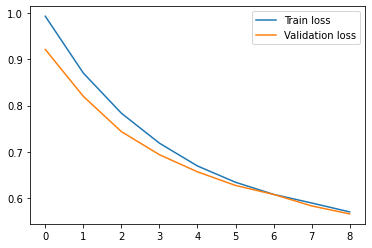

In [320]:
start = 1
plt.plot(hist.history['loss'][start:])
plt.plot(hist.history['val_loss'][start:])
plt.legend(['Train loss', 'Validation loss'])

In [322]:
# Можно предсказать вероятности для тестовой выборки
model.predict(X_test)

array([[2.3987415e-05, 1.6675651e-04, 4.7753012e-04, ..., 3.0850115e-01,
        6.4046988e-03, 2.4491742e-01],
       [4.5080283e-03, 7.9907809e-04, 8.8967681e-01, ..., 3.1222329e-03,
        4.5986226e-04, 5.5565356e-06],
       [4.6399985e-03, 6.2489182e-01, 1.3168527e-02, ..., 1.2906158e-02,
        6.9874153e-04, 2.9068032e-02],
       ...,
       [8.6782975e-03, 2.5186770e-05, 1.6881666e-03, ..., 7.8612153e-05,
        9.4313991e-01, 1.7401377e-04],
       [1.0344349e-03, 9.6582699e-01, 1.5519779e-03, ..., 1.6239859e-04,
        4.3981386e-04, 1.0225584e-03],
       [5.2580166e-05, 2.8356555e-04, 2.7395197e-04, ..., 1.3172796e-02,
        1.2067805e-02, 6.0062646e-03]], dtype=float32)

In [324]:
# А можно классы 
# model.predict_classes(X_test) # работает для севеншела
tf.argmax(model.predict(X_test), axis=1)

<tf.Tensor: shape=(10000,), dtype=int64, numpy=array([9, 2, 1, ..., 8, 1, 5])>

In [325]:
# Можно найти logloss 
loss_function(y_test,model.predict(X_test))

<tf.Tensor: shape=(), dtype=float32, numpy=0.60019445>

In [326]:
# Можно посмотреть на качество модели по всем указанным при коммпиляции метрикам. 
score = model.evaluate(X_test, y_test, verbose=0)
score 

[0.5993099808692932, 0.8015999794006348]

Этот способ учить модели более простой, но менее универсальный. В будущем мы увидим довольно много ограничений, которые на нас накладывает такой подход.

# N+1. Как Tensorflow работал раньше 

Больше такой код не надо писать никогда и нигде. Если видите его в туториалах в интернете, сразу закрывайте их. Эти туториалы устарели. Можете попробовать подуть на них (сдуть слой пыли), а дальше попробовать самостоятельно переписать старый код на новый. Это неплохое упражнение :) 

In [327]:
import tensorflow.compat.v1 as tf  # подгружаем первую версию библиотеки 
tf.disable_v2_behavior()           # отключаем функционал второй 
                                   # теперь код, написанный на версии tf 1.x должен работать 
tf.__version__

Instructions for updating:
non-resource variables are not supported in the long term


'2.5.0'

Раньше сначала надо было задать структуру вычислений с помощью тензоров. 

In [328]:
# что происходило в первой версии 
a = tf.constant([1, 2])
b = tf.constant([3, 4])

print(a + b)

Tensor("add:0", shape=(2,), dtype=int32)


Результат на лету было увидеть нельзя. 

In [332]:
d = a + b
d

<tf.Tensor 'add_3:0' shape=(2,) dtype=int32>

Если хотелось результата, надо было запускать вычислительную сессию, которая прогоняла все данные через граф.

In [333]:
# открываем вычислительную сессию 
with tf.Session() as sess:
    print(sess.run(d))

[4 6]


In [334]:
# либо можно было открыть глобальную сессию 
sess = tf.InteractiveSession()
d.eval()

array([4, 6], dtype=int32)

Процедура обучения модели выглядела раньше иначе. Кроме переменных в обучении участие принимал ещё один объект, `placeholder`. 

* __placeholder__ — место в графе, которое может принимать входные параметры в граф извне. В эти места мы будем вставлять наши данные

In [335]:
epochs = 10

# плейсхолдеры для данных 
# "Я обещаю вставить сюда x и y позже"
x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)

# параметры модели 
a = tf.Variable(tf.zeros([1]), name='bias')
b = tf.Variable(tf.zeros([1]), name='k')

# модель 
y_hat = b*x + a

# функция потерь и метод оптимизации
loss = tf.sqrt(tf.reduce_sum((y - y_hat)**2))
opt = tf.train.AdamOptimizer(learning_rate = 0.1)

# из-за того, что не было динамических вычислений, 
# было проще с градиентами
step = opt.minimize(loss)

# Но зато было сложнее с процедурой обучения, надо было запускать ... сессии
# открываем вычислительную сессию 
with tf.Session() as sess:
    
    # инициализировали все переменные 
    tf.global_variables_initializer().run() 
    
    for i in range(epochs):
        
        # Дорогая сессия, вычисли мне результат функции потерь, пожалуйста! Вот тебе конкретные x и y! 
        cur_loss = sess.run(loss, feed_dict={x:celsius, y:fahrenheit})
        print('Текущие потери:', cur_loss)
        
        # шаг оптимизации 
        sess.run(step, feed_dict={x:celsius, y:fahrenheit})
        
    print('\nКоэффициенты:', a.eval()[0], b.eval()[0])
    print('Прогнозы:', sess.run(y_hat, feed_dict={x:[-40,0,38]}))

Текущие потери: 153.62617
Текущие потери: 148.2056
Текущие потери: 142.8606
Текущие потери: 137.60123
Текущие потери: 132.43892
Текущие потери: 127.38669
Текущие потери: 122.45928
Текущие потери: 117.67331
Текущие потери: 113.047386
Текущие потери: 108.60223

Коэффициенты: 1.0066519 0.9923882
Прогнозы: [-38.688873    1.0066519  38.717403 ]


## Почиташки

* [Эффективный tensorflow 2.0](https://www.tensorflow.org/guide/effective_tf2)
* [Простые примеры кода на tensorflow 2.0](https://github.com/aymericdamien/TensorFlow-Examples/tree/master/tensorflow_v2)
* [Очень-очень милая презентация про fashion mnist](https://github.com/fbchow/fashion-mnist-tensorflow/blob/master/ml-fashion-mnist-presentation.pdf)


__Немного старья:__

* [Введение в старую версию Tensorflow на Хабре](https://habrahabr.ru/company/ods/blog/324898/)
* [Введение в старый Tensorflow от ШАД,](https://nbviewer.jupyter.org/github/yandexdataschool/Practical_DL/blob/fall18/week02_autodiff/seminar_tensorflow.ipynb) моя тетрадка частично основана на этой тетрадке, хоть сходство на первый взгляд и не заметно. 
* [Неплохая подборка разных тетрадок](https://github.com/Hvass-Labs/TensorFlow-Tutorials) на разном tensorflow